# The Sparks Foundation Internship Program :- #GRIPJULY21

## Name - Ansh Dube

## TASK-1 :- Prediction using Supervised ML
### Objective:- Predict the percentage of an student based on the no. of study hours.
___________________________________________________________________________________________

### Importing all required libraries

In [14]:
#importing all important libraries.

import pandas as pd                                      #pandas is for working with csv files & data manipulation
import numpy as np                                       #for working with arrays
import matplotlib.pyplot as plt                          #for data visualization
%matplotlib inline
from sklearn.model_selection import train_test_split     #for spiliting data into subsets
from sklearn.linear_model import LinearRegression        #for linear regression
from sklearn import metrics  

### Reading remote dataset using pandas

In [15]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

#Reading whole dataset
df

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Performing some EDA

In [6]:
#Checking the shape of the dataset
df.shape

(25, 2)

In [14]:
#Printing last 5 rows of the dataset
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [16]:
#Gathering some statistical data 
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [18]:
#Checking for missing values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [17]:
#checking correlation
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### It's time to visualize data by plotting graph using matplotlib

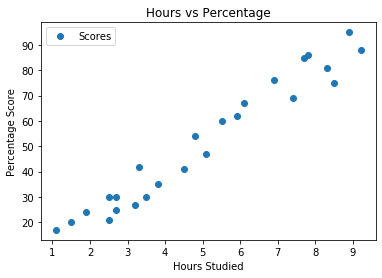

In [16]:
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### From the above graph , it is clear that the relation between the columns "Hours Studied" and "Percentage Score" is positive linear relation 

#### Hence we can say that Percentage of student increases as increase in hours studied.

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [17]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

### printing columns individually

In [18]:
# printing "Hours" column
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [30]:
# printing "Scores" column.
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

### **Data Spiliting**

In [10]:
#spilit data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### Printing trained and test data

In [37]:
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [34]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [35]:
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41])

In [38]:
y_test

array([20, 27, 69, 30, 62])

### **Implementing Linear Regression & Training model**

In [19]:
LinearModel = LinearRegression() 

#fitting the model
LinearModel.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

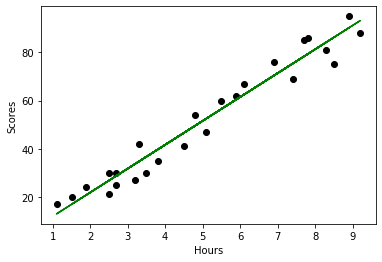

In [20]:
# Plotting the regression line
line = LinearModel.coef_*X+LinearModel.intercept_

# Plotting for the test data
plt.scatter(X, y, color = "Black")
plt.plot(X, line, color = "Green")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

### **Making Predictions**

In [21]:
# Testing data - In Hours
print(X_test) 

# Predicting the scores
y_pred = LinearModel.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [22]:
# Comparing Actual vs Predicted
comp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
comp

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
#visualizing the compared data by ploting a graph
comp.plot()

### **Predicting the percentage of an student if he/she studies for 9.25 hrs/day.**

In [72]:
# You can also test with your own data
hours = 9.25
own_pred = LinearModel.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


### From our predicted model , it is clear that if a student studies for 9.25 hrs/day there is high possibility of getting 93.69173248737539 %

### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [11]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

NameError: name 'y_pred' is not defined